**Prathmesh Thakare**

## **AI for Medical Diagnosis of X-ray Data**

In [ ]:
!pip install tensorflow keras

In [ ]:
!pip install opendatasets

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import opendatasets as od

In [ ]:
od.download("https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia", force=True)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

Abort: ignored

In [ ]:
dataset_dir = "chest-xray-pneumonia/chest_xray/"
train_dir = os.path.join(dataset_dir, 'train')
test_dir = os.path.join(dataset_dir, 'test')

In [ ]:
# Data preprocessing
batch_size = 32
image_size = (150, 150)

train_datagen = ImageDataGenerator(rescale=1.0/255.0,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=image_size,
                                                    batch_size=batch_size,
                                                    class_mode='binary')

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=image_size,
                                                  batch_size=batch_size,
                                                  class_mode='binary')


Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
# Build the AI model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
epochs = 10

history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=epochs,
                    validation_data=test_generator,
                    validation_steps=len(test_generator))

Epoch 1/10
163/163 [==============================] - 326s 2s/step - loss: 0.3856 - accuracy: 0.8315 - val_loss: 0.4114 - val_accuracy: 0.8045
Epoch 2/10
163/163 [==============================] - 317s 2s/step - loss: 0.2621 - accuracy: 0.8901 - val_loss: 0.5435 - val_accuracy: 0.7853
Epoch 3/10
163/163 [==============================] - 312s 2s/step - loss: 0.2326 - accuracy: 0.9051 - val_loss: 0.3980 - val_accuracy: 0.8494
Epoch 4/10
163/163 [==============================] - 318s 2s/step - loss: 0.2110 - accuracy: 0.9147 - val_loss: 0.7082 - val_accuracy: 0.7612
Epoch 5/10
163/163 [==============================] - 309s 2s/step - loss: 0.1954 - accuracy: 0.9239 - val_loss: 0.4851 - val_accuracy: 0.8381
Epoch 6/10
163/163 [==============================] - 320s 2s/step - loss: 0.1846 - accuracy: 0.9310 - val_loss: 0.4156 - val_accuracy: 0.8446
Epoch 7/10
163/163 [==============================] - 308s 2s/step - loss: 0.1716 - accuracy: 0.9317 - val_loss: 0.3712 - val_accuracy: 0.8798

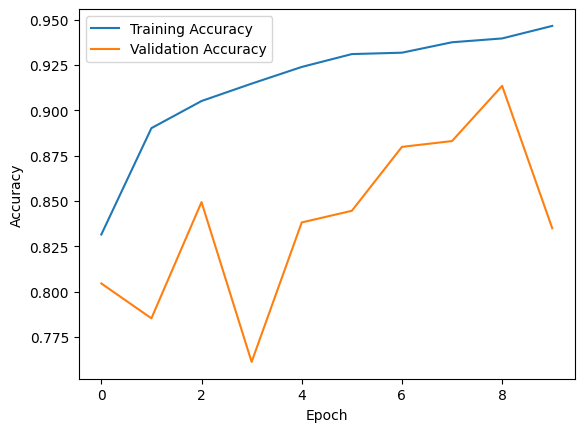

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()